<a href="https://colab.research.google.com/github/Abhinavl3v3l/EVA3/blob/master/Assignment5_final_TBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist                                                # Importing Necessary Libraries and dataset(in keras)

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()                        # mnist data divided into Training and Test Data
                                                                                # Where X_train are 60K 28x28 gray scale training images of numbers from [0-9] 
                                                                                # y_train are label of numbers from [0-9]

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


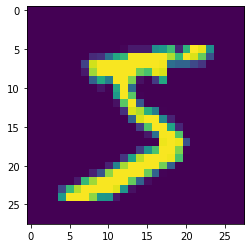

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])                                                           # Displaying what one of the images look like.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)                           # (60000, 28, 28) ->  (60000, 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Image Normalization 

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False)
X_train, y_train = iterator.next()

In [0]:
X_train = X_train.astype('float32')                                             # Convert to float type
X_test = X_test.astype('float32') 
X_train /= 255
X_test /= 255                                                                   # Floating Value ranges from [0,1]

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)                                  
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]                                                                    ## y_train to Y_train  - example,5 value is converted to an array where 5th element of array is 1(lit) and rest all is 0 
                                                                                
                                                                                # OR 
                                                                                
                                                                                # 1 Hot Encoded  


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Assignment 5

1. Change the code 8 or your own 4th Code from Assignment 4 to include:
  - image normalization
  - L2 regularization
  - ReLU after BN
2. Run your new code for 40 epochs and save the model with highest validation accuracy
3. Find out 25 misclassified images from the validation dataset and create an image gallery
4. Submit





In [11]:
# Network 

from keras.layers import Activation
model = Sequential()

# L2 work for well for very large number of kernels but we don't have large number of kernel here, might backfire.
 
model.add(BatchNormalization())#BN before RELU
model.add(Convolution2D(12,( 3, 3), activation='relu', input_shape=(28,28,1)))    #26
model.add(Dropout(0.1))
len(model.layers)

3

In [12]:
w = model.layers[1].get_weights()
w

[]

In [0]:

model.add(BatchNormalization())#BN before RELU

model.add(Convolution2D(20, (3, 3), activation='relu'))                         #24
model.add(Dropout(0.1))


model.add(Convolution2D(10, (1, 1), activation='relu'))                           #24
model.add(MaxPooling2D(pool_size=(2, 2)))                                       #12

model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu'))                           #10

model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu'))                           #8
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu'))                           #6
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu'))                           #4
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
# Define custom loss
def custom_loss(actual,predicted):
    sqr_w = 0
    lamda = 0.01 #1e-4

    for layer in model.layers:
       print(layer.get_weights())
       sqr_w = sqr_w + np.sum(np.sum(np.sum(np.square(layer.get_weights()))))

    l2_regularization = (lamda*sqr_w)/2*(bs)
    loss = keras.losses.categorical_crossentropy(actual,predicted) + l2_regularization

    # Return a function
    return loss

In [15]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
bs =128
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy',custom_loss])

In [16]:
# Running for 40 Epochs

model.fit(X_train, Y_train, batch_size=bs, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

model.summary()











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


[array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32)]
[array([[[[ 0.04039453,  0.12600012,  0.08220027, -0.14303634,
          -0.14214814,  0.05413608, -0.1564173 , -0.015613  ,
          -0.10957072,  0.01101641,  0.19804196,  0.20743956]],

        [[-0.05648433, -0.11133818, -0.06272398,  0.17617466,
           0.05326612,  0.11727203, -0.05391932, -0.13875586,
          -0.03034569,  0.0954517 ,  0.12684233, -0.05589183]],

        [[-0.09716354, -0.1841626 ,  0.0818048 , -0.04915017,
           0.11086757, -0.01308315, -0.13172244, -0.15980291,
          -0.04461378,  0.12966608,  0.15354712,  0.00535399]]],


       [[[-0.02906631, -0.10854705, -0.18614867, -0.19500539,
          -0.21141595,  0.16031642, -0.11269033,  0.00314234,
           0.1581469 ,  0.13067247, -0.00148751,  0.18746029]],

 

In [0]:
# from keras.optimizers import Adam
# from keras.callbacks import LearningRateScheduler
# def scheduler(epoch, lr):
#   return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)                               # Evaluate the Model over test data

In [19]:
print(score)                                                                    # Accuracy over test data.

[4.178411547088623, 0.7254, 160.93056025390624]


In [0]:
y_pred = model.predict(X_test)                                                  # predicting the values with validation accuracy

In [21]:
print(y_pred[:9])                                                               
print(y_test[:9])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0475498e-25 1.6321155e-35 4.5395174e-16 3.7464698e-19 9.0166877e-31
  4.5100969e-27 6.1507831e-27 0.0000000e+00 1.0000000e+00 4.1075908e-25]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.3988874e-20]
 [0.0000000e+00 3.0359957e-30 5.6486189e-09 5.0293702e-33 4.6899813e-18
  0.0000000e+00 1.5067583e-34 0.0000000e+00 5.1095122e-01 4.8904881e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 

In [27]:
# # Drive Fromalities
# from google.colab import drive
# drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [44]:
# import os
# print( os.getcwd() )
# print( os.listdir() )

/content
['.config', 'foo6.png', 'foo60.png', 'foo14.png', 'foo46.png', 'foo69.png', 'foo11.png', 'foo33.png', 'foo5.png', 'foo74.png', 'foo29.png', 'foo67.png', 'myzip.zip', 'foo40.png', 'foo39.png', 'foo31.png', 'foo80.png', 'foo57.png', 'foo17.png', 'foo37.png', 'foo24.png', 'foo70.png', 'foo21.png', 'gdrive', 'foo2.png', 'foo41.png', 'foo79.png', 'foo26.png', 'sample_data']


In [0]:
# from google.colab import files
# list_image = ['foo6.png', 'foo60.png', 'foo14.png', 'foo46.png', 'foo69.png', 'foo11.png', 'foo33.png', 
#               'foo5.png', 'foo74.png', 'foo29.png', 'foo67.png', 'foo40.png', 'foo39.png', 'foo31.png', 
#               'foo80.png', 'foo57.png', 'foo17.png', 'foo37.png', 'foo24.png', 'foo70.png', 'foo21.png',
#               'foo2.png', 'foo41.png', 'foo79.png', 'foo26.png']
# len(list_image)
# # for i in list_image:
#   # print(i)
#   # files.download(i)
# files.download('foo26.png')

(10000, 10)
[2, 5, 6, 11, 14, 17, 21, 24, 26, 29, 31, 33, 37, 39, 40, 41, 46, 57, 60, 67, 69, 70, 74, 79, 80, 83, 89, 94, 95, 96, 97, 107, 110, 111, 115, 124, 128, 135, 137, 139, 143, 145, 154, 163, 166, 168, 171, 175, 176, 177, 178, 180, 184, 189, 190, 191, 196, 202, 203, 204, 217, 220, 223, 224, 226, 228, 229, 233, 239, 242, 243, 246, 247, 250, 251, 254, 255, 257, 262, 263, 265, 267, 272, 276, 279, 282, 286, 287, 288, 290, 297, 300, 302, 307, 314, 324, 325, 329, 330, 332, 337, 338, 342, 345, 348, 350, 354, 357, 358, 360, 368, 372, 376, 377, 378, 385, 388, 393, 398, 399, 405, 409, 410, 411, 413, 415, 416, 419, 420, 425, 427, 430, 435, 438, 439, 445, 449, 455, 462, 465, 468, 473, 476, 480, 489, 495, 504, 506, 508, 510, 519, 522, 523, 527, 529, 532, 533, 534, 537, 542, 543, 550, 551, 552, 554, 557, 565, 571, 579, 580, 584, 591, 605, 610, 615, 617, 618, 619, 625, 631, 636, 640, 647, 649, 650, 651, 652, 655, 658, 663, 666, 667, 668, 672, 675, 682, 684, 688, 689, 691, 695, 696, 698, 700, 7

AttributeError: ignored

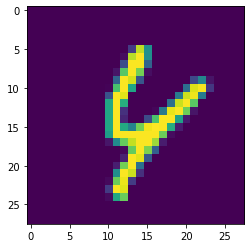

In [43]:
# # Misclassified Images 
# print(y_pred.shape) # (10000, 10)
# l =[]
# X_test = X_test.reshape(X_test.shape[0], 28, 28)
# for i in range(10000):
#   if(y_pred[i,y_test[i]] <0.5):
#     # print('Value of :',y_test[i],' is ',y_pred[i,y_test[i]])
#     l.append(i)

# import zipfile
# zf = zipfile.ZipFile('myzip.zip', mode='w')
# print(l)
# # First 25 Misclassified Images
# l2 = l[:25]
# # print(l2)
# from matplotlib import pyplot as plt
# # %matplotlib inline
# # for i in l2:
# #   print(i, y_test[i] , y_pred[i,y_test[i]] )
# #   image = plt.imshow(X_test[i])  
# #   image.savefig('foo'+str(i)+'.png')
# image = plt.imshow(X_test[325])  
# image.savefig('foo325.png')
